<a href="https://colab.research.google.com/github/ggfuentes78/TF_DataScience1/blob/master/ProyectoDS_ParteII_Fuentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors, metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

url='https://raw.githubusercontent.com/ggfuentes78/TF_DataScience1/master/EPH_ingresos.csv'
df= pd.read_csv(url, sep=',')

#label_ed_lvl=['Primaria Incompleta', 'Primaria Completa', 'Secundaria Incompleta', 'Secundaria Completa', 'Superior Universitaria Incompleta', 'Superior Universitaria Completa', 'Sin instruccion']

In [ ]:
df.head()

,year,quarter,region,city,weighs,gender,age,work_class,hours_worked_w,tot_income,ed_lvl,med_care,read_write,CH10,CH11,h_ed_lvl,CH13,nationality,PP04A
0,2023,4,44,17,281,1,34,3,36.0,450000.0,4,1,1,2,0,4,1,1,1.0
1,2023,4,44,17,281,2,32,3,15.0,200000.0,4,1,1,2,0,4,1,1,2.0
2,2023,4,44,93,85,1,47,2,60.0,400000.0,2,4,1,2,0,2,1,1,2.0
3,2023,4,42,26,216,1,33,3,48.0,480000.0,4,1,1,2,0,4,1,1,2.0
4,2023,4,42,26,115,1,46,1,98.0,120000.0,3,4,1,2,0,4,2,1,2.0


In [ ]:
df.drop(columns=['year', 'quarter'])

,region,city,weighs,gender,age,work_class,hours_worked_w,tot_income,ed_lvl,med_care,read_write,CH10,CH11,h_ed_lvl,CH13,nationality,PP04A
0,44,17,281,1,34,3,36.0,450000.0,4,1,1,2,0,4,1,1,1.0
1,44,17,281,2,32,3,15.0,200000.0,4,1,1,2,0,4,1,1,2.0
2,44,93,85,1,47,2,60.0,400000.0,2,4,1,2,0,2,1,1,2.0
3,42,26,216,1,33,3,48.0,480000.0,4,1,1,2,0,4,1,1,2.0
4,42,26,115,1,46,1,98.0,120000.0,3,4,1,2,0,4,2,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16841,43,13,853,2,31,3,45.0,170000.0,3,1,1,2,0,5,2,1,2.0
16842,43,13,946,2,28,3,40.0,220000.0,6,1,1,2,0,7,1,1,1.0
16843,43,13,634,2,47,3,40.0,100000.0,4,1,1,2,0,4,1,1,2.0
16844,43,13,634,1,42,2,20.0,40000.0,1,4,1,2,0,2,2,1,2.0


In [ ]:
df.drop(columns=['year', 'quarter', 'nationality', 'PP04A', 'read_write', 'weighs', 'med_care'], inplace=True)
df.columns

Index(['region', 'city', 'gender', 'age', 'work_class', 'hours_worked_w',
       'tot_income', 'ed_lvl', 'CH10', 'CH11', 'h_ed_lvl', 'CH13'],
      dtype='object')

In [ ]:
df.head()

,year,quarter,region,city,weighs,gender,age,work_class,hours_worked_w,tot_income,ed_lvl,med_care,read_write,CH10,CH11,h_ed_lvl,CH13,nationality,PP04A
0,2023,4,44,17,281,1,34,3,36.0,450000.0,4,1,1,2,0,4,1,1,1.0
1,2023,4,44,17,281,2,32,3,15.0,200000.0,4,1,1,2,0,4,1,1,2.0
2,2023,4,44,93,85,1,47,2,60.0,400000.0,2,4,1,2,0,2,1,1,2.0
3,2023,4,42,26,216,1,33,3,48.0,480000.0,4,1,1,2,0,4,1,1,2.0
4,2023,4,42,26,115,1,46,1,98.0,120000.0,3,4,1,2,0,4,2,1,2.0


In [ ]:
seed = 1

X_gender = df.drop(columns=["gender"])
y_gender = df["gender"]

X_ed_lvl = df.drop(columns=["ed_lvl"])
y_ed_lvl = df["ed_lvl"]


X_train, X_test, y_train, y_test = train_test_split(X_ed_lvl, y_ed_lvl, test_size=0.2, random_state=seed)

X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X_gender, y_gender, test_size=0.2, random_state=seed)

<Figure size 1000x600 with 0 Axes>

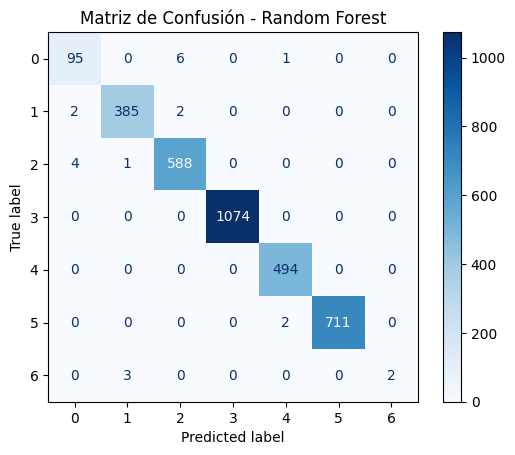

In [ ]:
#RandomForest

modelo= RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
y_pred= modelo.predict(X_test)

plt.figure(figsize=(10,6))
cm=confusion_matrix(y_test, y_pred)

disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion.ravel()

array([  95,    0,    6,    0,    1,    0,    0,    2,  385,    2,    0,
          0,    0,    0,    4,    1,  588,    0,    0,    0,    0,    0,
          0,    0, 1074,    0,    0,    0,    0,    0,    0,    0,  494,
          0,    0,    0,    0,    0,    0,    2,  711,    0,    0,    3,
          0,    0,    0,    0,    2])

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9937685459940653

In [ ]:
# Precision se evalua para cada categoria
#precision_positiva = metrics.precision_score(y_test, y_pred, average='weighted')
#precision_negativa = metrics.precision_score(y_test, y_pred, average='weighted')
#precision_positiva, precision_negativa

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.93      0.94       102
           2       0.99      0.99      0.99       389
           3       0.99      0.99      0.99       593
           4       1.00      1.00      1.00      1074
           5       0.99      1.00      1.00       494
           6       1.00      1.00      1.00       713
           7       1.00      0.40      0.57         5

    accuracy                           0.99      3370
   macro avg       0.99      0.90      0.93      3370
weighted avg       0.99      0.99      0.99      3370



<Figure size 1000x600 with 0 Axes>

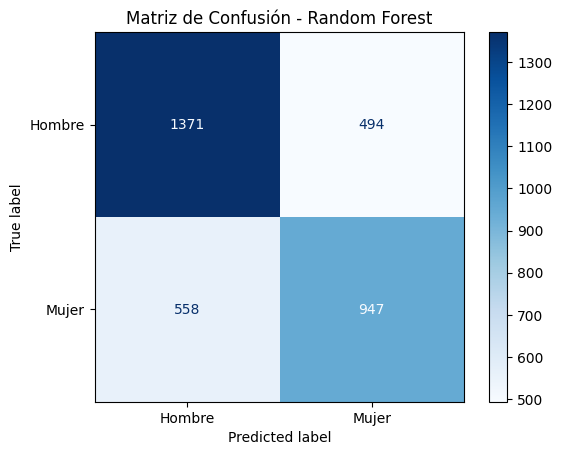

In [ ]:
#RandomForest

modelo_gender= RandomForestClassifier(random_state=1)
modelo_gender.fit(X_train_gender, y_train_gender)
y_pred_gender= modelo_gender.predict(X_test_gender)

plt.figure(figsize=(10,6))
cm_gender=confusion_matrix(y_test_gender, y_pred_gender)

disp_gender= ConfusionMatrixDisplay(confusion_matrix=cm_gender, display_labels=['Hombre','Mujer'])
disp_gender.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

In [ ]:
print(metrics.classification_report(y_test_gender, y_pred_gender))

              precision    recall  f1-score   support

           1       0.71      0.74      0.72      1865
           2       0.66      0.63      0.64      1505

    accuracy                           0.69      3370
   macro avg       0.68      0.68      0.68      3370
weighted avg       0.69      0.69      0.69      3370



In [ ]:
X_tot_income= df.drop(columns=["tot_income"])
y_tot_income= df["tot_income"]

X_train_tot_income, X_test_tot_income, y_train_tot_income, y_test_tot_income = train_test_split(X_tot_income, y_tot_income, test_size=0.2, random_state=1)
model_tot_income= LogisticRegression(max_iter=10000, n_jobs=-1)

model_tot_income.fit(X_train_tot_income, y_train_tot_income)

pred_tot_income= model_tot_income.predict(X_test_tot_income)

print(metrics.classification_report(y_test_tot_income, pred_tot_income))
#

cm_tot_income=confusion_matrix(y_test_tot_income, y_pred_tot_income)
disp_tot_income= ConfusionMatrixDisplay(confusion_matrix=cm_tot_income)
disp_tot_income.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

In [ ]:
cm_tot_income=confusion_matrix(y_test_tot_income, y_pred_tot_income)
disp_tot_income= ConfusionMatrixDisplay(confusion_matrix=cm_tot_income)
disp_tot_income.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

NameError: name 'y_pred_tot_income' is not defined

In [ ]:
iso_forest = IsolationForest()
iso_forest.fit(df[["tot_income"]])

outliers_pred = iso_forest.predict(df[["tot_income"]])
not_outliers = [True if x==1 else False for x in outliers_pred]
X_without_outliers = df[['tot_income']][not_outliers]
outliers_pred = [False if x==1 else True for x in outliers_pred]
print(f"Outliers: {df[['tot_income']][outliers_pred].shape}")
print(f"Not outliers: {X_without_outliers.shape}")

Outliers: (2935, 1)
Not outliers: (13911, 1)


In [ ]:
X_tot_income= df.drop(columns=["tot_income"])
y_tot_income= df["tot_income"]

X_train_tot_income, X_test_tot_income, y_train_tot_income, y_test_tot_income = train_test_split(X_tot_income, y_tot_income, test_size=0.2, random_state=1)
#model_tot_income= LogisticRegression(max_iter=10000, n_jobs=-1)

knn_params = {"n_neighbors": np.arange(5, 100, 5)}

gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [2, 3, 4],
}


#Busco los mejores hiperparametros para KNN
random_search = RandomizedSearchCV(KNeighborsRegressor(), knn_params)
random_search.fit(X_train_tot_income, y_train_tot_income)
print(random_search.best_score_)
print(random_search.best_params_)

y_pred_tot_income= random_search.best_estimator_.predict(X_test_tot_income)

mae = mean_absolute_error(y_test_tot_income, y_pred_tot_income)
mse = mean_squared_error(y_test_tot_income, y_pred_tot_income)
r2 = r2_score(y_test_tot_income, y_pred_tot_income)
print('Model: KNeighborsRegressor', )
print('MAE: ', mae)
print('MSE: ', mse)
print('R2: ', r2)



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.06967611678335246
{'n_neighbors': 55}
Model: KNeighborsRegressor
MAE:  131605.6319125978
MSE:  52812746263.81228
R2:  0.08338116413582819


In [ ]:
X_tot_income= df.drop(columns=["tot_income"])
y_tot_income= df["tot_income"]

X_train_tot_income, X_test_tot_income, y_train_tot_income, y_test_tot_income = train_test_split(X_tot_income, y_tot_income, test_size=0.2, random_state=1)


gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [2, 3, 4],
}


#Busco los mejores hiperparametros para KNN
random_search = RandomizedSearchCV(GradientBoostingRegressor(), gb_params)
random_search.fit(X_train_tot_income, y_train_tot_income)
print(random_search.best_score_)
print(random_search.best_params_)

y_pred_tot_income= random_search.best_estimator_.predict(X_test_tot_income)

mae = mean_absolute_error(y_test_tot_income, y_pred_tot_income)
mse = mean_squared_error(y_test_tot_income, y_pred_tot_income)
r2 = r2_score(y_test_tot_income, y_pred_tot_income)

print('Model: GradientBootingRegressor', )
print('MAE: ', mae)
print('MSE: ', mse)
print('R2: ', r2)



0.28792894961935156
{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}
Model: GradientBootingRegressor
MAE:  106209.28288257144
MSE:  42745112922.22055
R2:  0.2581151631477364


#Conclusion
Se logro predecir con exito el nivel de estudios de la poblacion (ed_lvl) con una precision

Se intento predecir el nivel de ingresos (tot_income) con KNN y GradientBoosting y si bien este ultimo arrojo resultados "mejores", la precision del modelo es muy baja (R2 en 0,2581) por lo que no sirve para analizar la predecir la variable objetivo.

